In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# 1. Plot DBSCAN results across 100 different epsilon values

In [4]:
cwd = os.getcwd()
suffix_results = "epsilon_values_V1.csv"
path_results = os.path.join(cwd, suffix_results)
df = pd.read_csv(path_results)
df.sort_values("epsilon", inplace = True)

real_total_cost = df.iloc[0]["total_cost"]
df["Total Cost Error"] = df["total_cost"] - real_total_cost

df

,epsilon,total_cost,Run_time,Total Cost Error
18,0.001000,4884.122098,32.769,0.000000
42,0.011091,4884.043361,28.601,-0.078737
17,0.021182,4884.043361,26.718,-0.078737
37,0.031273,4884.043361,30.628,-0.078737
16,0.041364,4884.043241,24.465,-0.078857
...,...,...,...,...
1,0.626636,20931.146151,2.101,16047.024053
8,0.636727,5905.117637,2.307,1020.995539
50,0.646818,20877.263965,2.966,15993.141867
11,0.656909,16860.839047,2.822,11976.716950


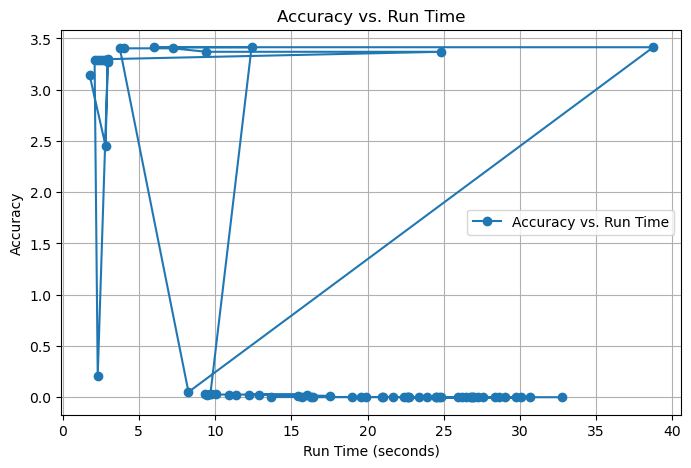

In [5]:
# Compute accuracy
total_cost_001 = df.loc[df["epsilon"] == 0.001, "total_cost"].values[0]
df["accuracy"] = abs((total_cost_001 - df["total_cost"]) / total_cost_001)

# Plot accuracy vs. run time
plt.figure(figsize=(8, 5))
plt.plot(df["Run_time"], df["accuracy"], marker='o', linestyle='-', label="Accuracy vs. Run Time")
plt.xlabel("Run Time (seconds)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Run Time")
plt.grid()
plt.legend()
plt.show()

In [6]:
# Identify the outlier  
indexes_to_drop = df[((df["Run_time"] > 10) & (df["epsilon"] > 0.5))].index
df[(df["Run_time"] > 10) & (df["epsilon"] > 0.5)]

,epsilon,total_cost,Run_time,Total Cost Error,accuracy
56,0.505545,21558.507171,38.738,16674.385073,3.413998
65,0.566091,21341.662997,24.798,16457.540900,3.369601


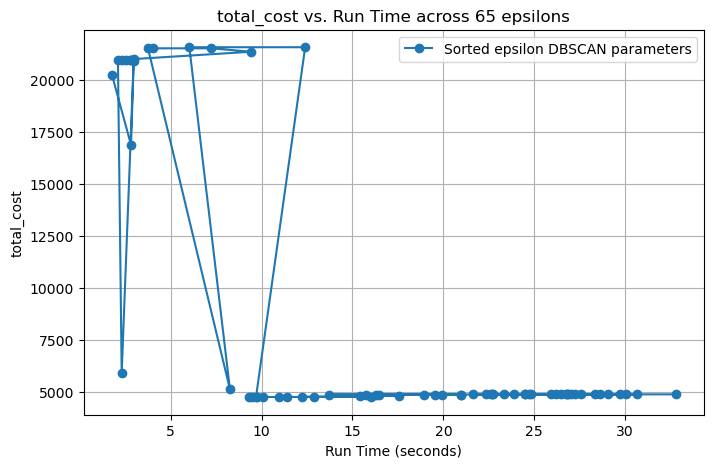

In [7]:
# Drop the outlier
df_no_outlier = df.drop(indexes_to_drop, axis = 0)

# Plot accuracy vs. run time
plt.figure(figsize=(8, 5))
plt.plot(df_no_outlier["Run_time"], df_no_outlier["total_cost"], marker='o', linestyle='-', label="Sorted epsilon DBSCAN parameters")
plt.xlabel("Run Time (seconds)")
plt.ylabel("total_cost")
plt.title("total_cost vs. Run Time across {} epsilons".format(len(df_no_outlier)))
plt.grid()
plt.legend()
plt.show()

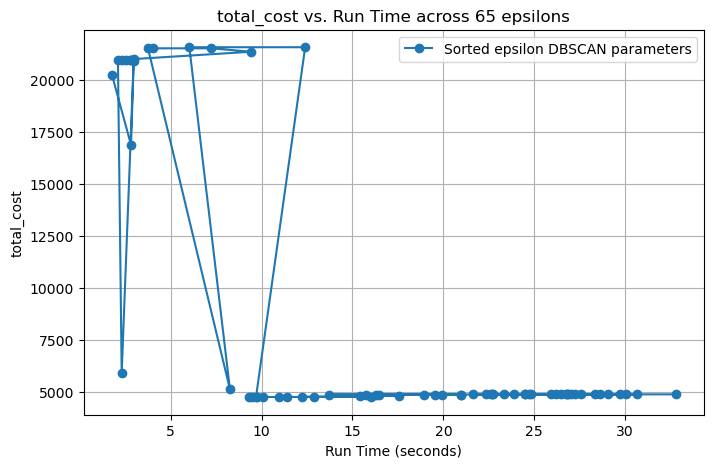

In [8]:
# Drop the outlier
df_no_outlier = df.drop(indexes_to_drop, axis = 0)

# Plot accuracy vs. run time
plt.figure(figsize=(8, 5))
plt.plot(df_no_outlier["Run_time"], df_no_outlier["total_cost"], marker='o', linestyle='-', label="Sorted epsilon DBSCAN parameters")
plt.xlabel("Run Time (seconds)")
plt.ylabel("total_cost")
plt.title("total_cost vs. Run Time across {} epsilons".format(len(df_no_outlier)))
plt.grid()
plt.legend()
plt.show()

In [9]:
df_no_outlier

,epsilon,total_cost,Run_time,Total Cost Error,accuracy
18,0.001000,4884.122098,32.769,0.000000,0.000000
42,0.011091,4884.043361,28.601,-0.078737,0.000016
17,0.021182,4884.043361,26.718,-0.078737,0.000016
37,0.031273,4884.043361,30.628,-0.078737,0.000016
16,0.041364,4884.043241,24.465,-0.078857,0.000016
...,...,...,...,...,...
1,0.626636,20931.146151,2.101,16047.024053,3.285549
8,0.636727,5905.117637,2.307,1020.995539,0.209044
50,0.646818,20877.263965,2.966,15993.141867,3.274517
11,0.656909,16860.839047,2.822,11976.716950,2.452174


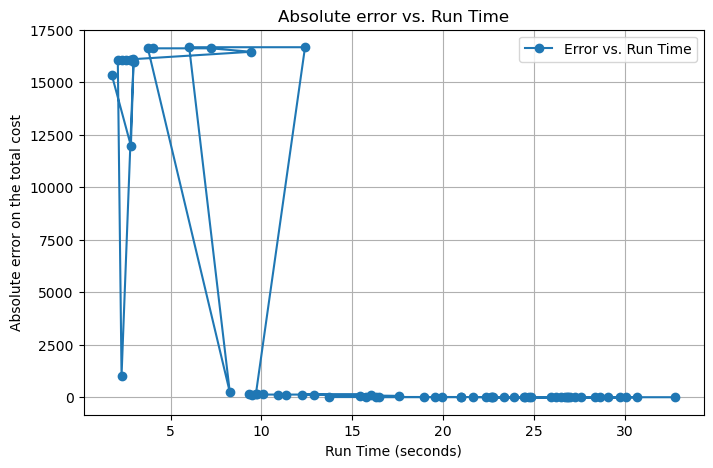

In [10]:
# Plot absolute error vs. run time 
plt.figure(figsize=(8, 5))
plt.plot(df_no_outlier["Run_time"], np.abs(df_no_outlier["Total Cost Error"]), marker='o', linestyle='-', label="Error vs. Run Time")
plt.xlabel("Run Time (seconds)")
plt.ylabel("Absolute error on the total cost")
plt.title("Absolute error vs. Run Time")
plt.grid()
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


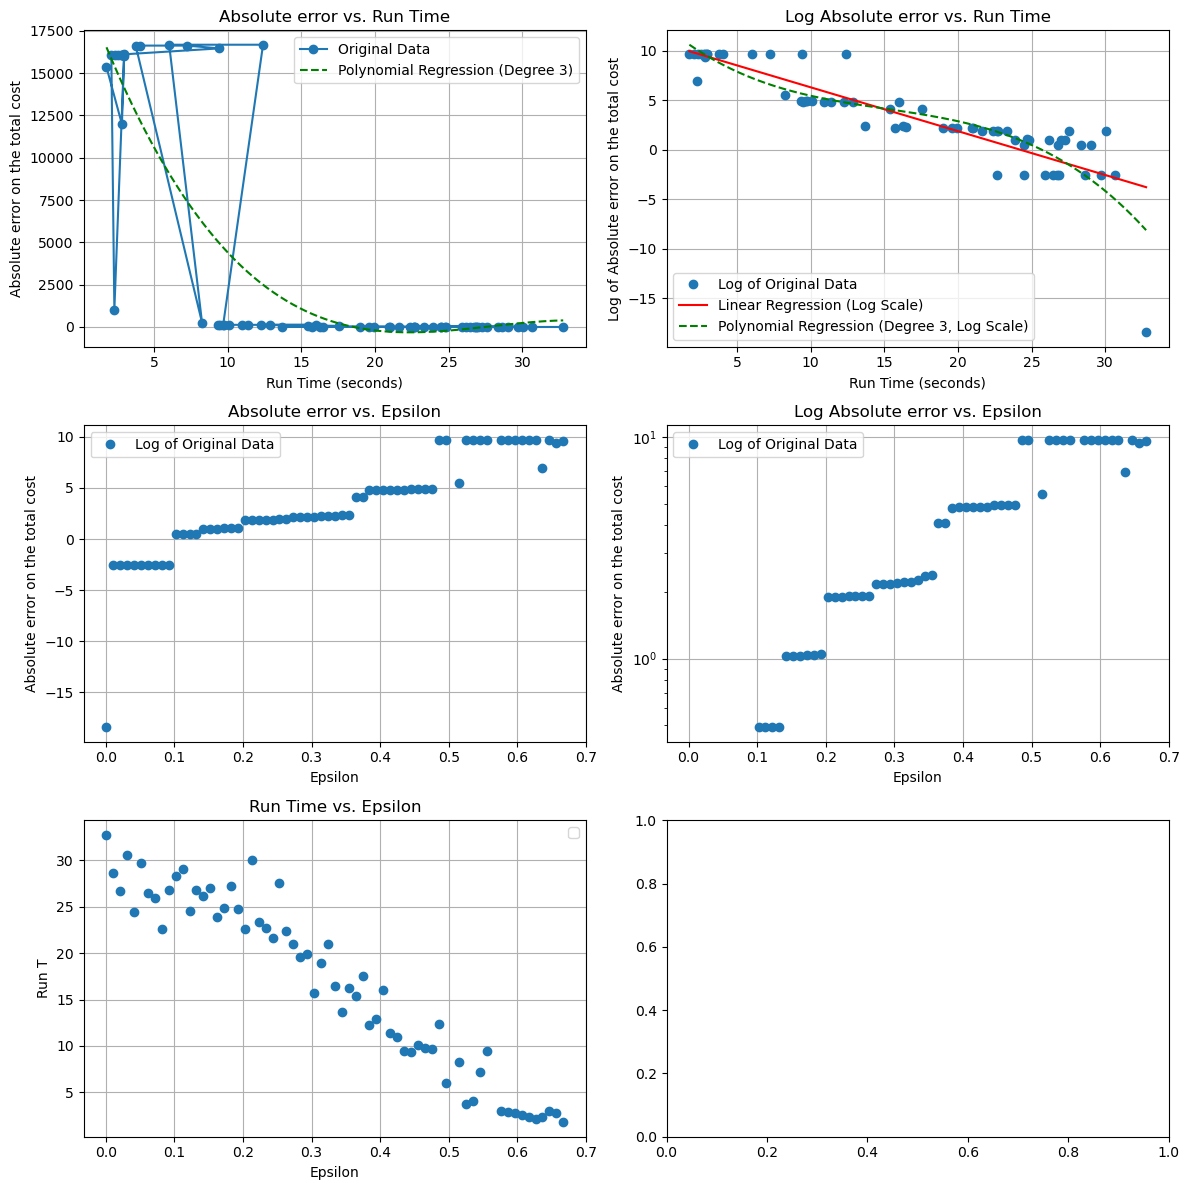

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Data preparation
x = df_no_outlier["Run_time"].values.reshape(-1, 1)  # Reshape for sklearn
y = np.abs(df_no_outlier["Total Cost Error"])

# ---- First Graph: Absolute Error vs. Run Time ----
# Linear Regression
linear_model_1 = LinearRegression()
linear_model_1.fit(x, y)
x_pred = np.linspace(x.min(), x.max(), 500).reshape(-1, 1)  # Smooth x values
y_linear_pred_1 = linear_model_1.predict(x_pred)

# Polynomial Regression
degree_1 = 3  # Degree of the polynomial
poly_1 = PolynomialFeatures(degree_1)
x_poly_1 = poly_1.fit_transform(x)
poly_model_1 = LinearRegression()
poly_model_1.fit(x_poly_1, y)
x_pred_poly_1 = poly_1.transform(x_pred)
y_poly_pred_1 = poly_model_1.predict(x_pred_poly_1)

# ---- Second Graph: Log of Absolute Error vs. Run Time ----
# Transform the target variable to log scale
log_y = np.log(np.abs(y) + 1e-8)  # Add small constant to avoid log(0)

# Linear Regression
linear_model_2 = LinearRegression()
linear_model_2.fit(x, log_y)
y_linear_pred_2 = linear_model_2.predict(x_pred)

# Polynomial Regression
degree_2 = 3  # Degree of the polynomial
poly_2 = PolynomialFeatures(degree_2)
x_poly_2 = poly_2.fit_transform(x)
poly_model_2 = LinearRegression()
poly_model_2.fit(x_poly_2, log_y)
x_pred_poly_2 = poly_2.transform(x_pred)
y_poly_pred_2 = poly_model_2.predict(x_pred_poly_2)

# ---- Plotting ----
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# ---- Subplot 1: Absolute Error vs. Run Time ----
ax[0,0].plot(x, y, 'o', linestyle='-', label="Original Data")
# ax[0,0].plot(x_pred, y_linear_pred_1, '-', label="Linear Regression", color='red')
ax[0,0].plot(x_pred, y_poly_pred_1, '--', label=f"Polynomial Regression (Degree {degree_1})", color='green')
ax[0,0].set_xlabel("Run Time (seconds)")
ax[0,0].set_ylabel("Absolute error on the total cost")
ax[0,0].set_title("Absolute error vs. Run Time")
ax[0,0].grid()
ax[0,0].legend()

# ---- Subplot 2: Log Absolute Error vs. Run Time ----
ax[0,1].plot(x, log_y, 'o', label="Log of Original Data")
ax[0,1].plot(x_pred, y_linear_pred_2, '-', label="Linear Regression (Log Scale)", color='red')
ax[0,1].plot(x_pred, y_poly_pred_2, '--', label=f"Polynomial Regression (Degree {degree_2}, Log Scale)", color='green')
ax[0,1].set_xlabel("Run Time (seconds)")
ax[0,1].set_ylabel("Log of Absolute error on the total cost")
ax[0,1].set_title("Log Absolute error vs. Run Time")
ax[0,1].grid()
ax[0,1].legend()

# --- Subplot 3: Plot Absolute error over epsilon
ax[1,0].plot(df_no_outlier["epsilon"], log_y, 'o', label="Log of Original Data")
ax[1,0].set_xlabel("Epsilon")
ax[1,0].set_ylabel("Absolute error on the total cost")
ax[1,0].set_title("Absolute error vs. Epsilon")
ax[1,0].grid()
ax[1,0].legend()

# --- Subplot 4: Plot Log  Absolute error over epsilon
ax[1,1].plot(df_no_outlier["epsilon"], log_y, 'o', label="Log of Original Data")
ax[1,1].set_xlabel("Epsilon")
ax[1,1].set_ylabel("Absolute error on the total cost")
ax[1,1].set_yscale("log")
# ax[1,1].set_xscale("log")
ax[1,1].set_title("Log Absolute error vs. Epsilon")
ax[1,1].grid()
ax[1,1].legend()

# --- Subplot 5: Plot Absolute error over epsilon
ax[2,0].plot(df_no_outlier["epsilon"], x, 'o')
ax[2,0].set_xlabel("Epsilon")
ax[2,0].set_ylabel("Run T")
ax[2,0].set_title("Run Time vs. Epsilon")
ax[2,0].grid()
ax[2,0].legend()


# Adjust layout and display
plt.tight_layout()
plt.show()


Conclusion: 
- Exponential decay of the absolute error with an increase in Run_time and therefore epsilon. This is concluded from the linear relationship between the log of the absolute error on the total cost and run_time.

# 3. Plots across six epsilon values

In [12]:
cwd = os.getcwd()
suffix_results = "epsilon_values.csv"
path_results = os.path.join(cwd, suffix_results)
df = pd.read_csv(path_results)
df.sort_values("epsilon", inplace = True)

real_total_cost = df.iloc[0]["total_cost"]
df["Total Cost Error"] = df["total_cost"] -real_total_cost

df

,epsilon,total_cost,Run_time,Total Cost Error
5,0.001,4884.122098,40.477,0.000000
1,0.003,4884.122098,37.265,0.000000
4,0.100,4882.490257,42.353,-1.631841
3,0.200,4877.396270,36.315,-6.725828
2,0.300,4875.231689,20.852,-8.890409
0,0.400,4759.271996,15.508,-124.850101
6,0.800,12714.046834,1.486,7829.924736


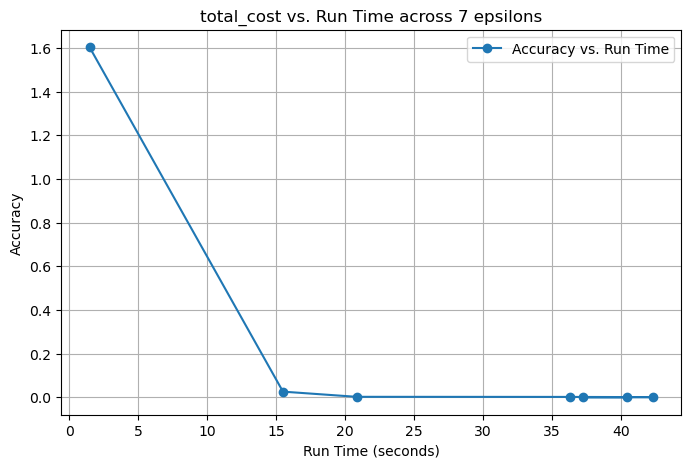

In [13]:
# Compute accuracy
total_cost_001 = df.loc[df["epsilon"] == 0.001, "total_cost"].values[0]
df["accuracy"] = abs((total_cost_001 - df["total_cost"]) / total_cost_001)

# Plot accuracy vs. run time
plt.figure(figsize=(8, 5))
plt.plot(df["Run_time"], df["accuracy"], marker='o', linestyle='-', label="Accuracy vs. Run Time")
plt.xlabel("Run Time (seconds)")
plt.ylabel("Accuracy")
plt.title("total_cost vs. Run Time across {} epsilons".format(len(df)))
plt.grid()
plt.legend()
plt.show()

In [14]:
# Identify the outlier  
indexes_to_drop = df[((df["Run_time"] > 10) & (df["epsilon"] > 0.5))].index
df[(df["Run_time"] > 10) & (df["epsilon"] > 0.5)]

,epsilon,total_cost,Run_time,Total Cost Error,accuracy


In [15]:
indexes_to_drop

Index([], dtype='int64')

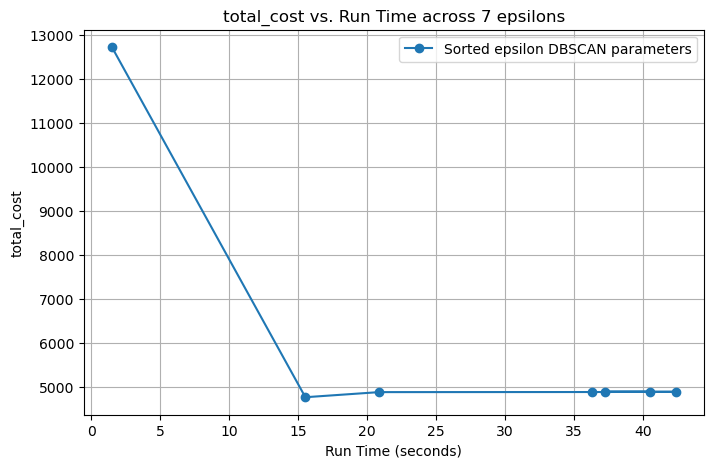

In [16]:
# Drop the outlier
df_no_outlier = df.drop(indexes_to_drop, axis = 0)

# Plot accuracy vs. run time
plt.figure(figsize=(8, 5))
plt.plot(df_no_outlier["Run_time"], df_no_outlier["total_cost"], marker='o', linestyle='-', label="Sorted epsilon DBSCAN parameters")
plt.xlabel("Run Time (seconds)")
plt.ylabel("total_cost")
plt.title("total_cost vs. Run Time across {} epsilons".format(len(df_no_outlier)))
plt.grid()
plt.legend()
plt.show()

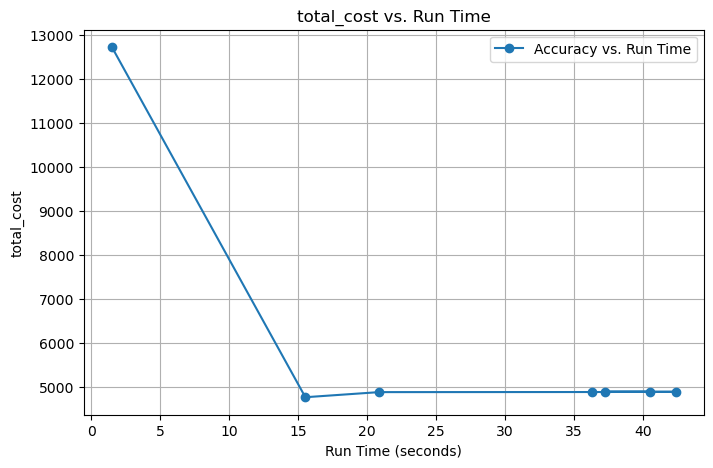

In [17]:
# Plot accuracy vs. run time
plt.figure(figsize=(8, 5))
plt.plot(df["Run_time"], df["total_cost"], marker='o', linestyle='-', label="Accuracy vs. Run Time")
plt.xlabel("Run Time (seconds)")
plt.ylabel("total_cost")
plt.title("total_cost vs. Run Time")
plt.grid()
plt.legend()
plt.show()

# 3. Plot DBSCAN and TDR accuracy vs run time across 100 epsilons and 20 TDR

In [30]:
cwd = os.getcwd()
suffix_results_TDR = "accuracy_run_time_TDR.csv"
path_results_TDR = os.path.join(cwd, suffix_results_TDR)
results_TDR = pd.read_csv(path_results_TDR)
results_TDR.sort_values("time_rep_period", ascending= False, inplace = True)

real_total_cost_TDR = results_TDR.iloc[0]["total_cost"]
results_TDR["Total Cost Error"] = np.abs(results_TDR["total_cost"] - real_total_cost_TDR)
results_TDR["Total Cost Error [%]"] = results_TDR["Total Cost Error"] / real_total_cost_TDR * 100

results_TDR

,time_rep_period,total_cost,Run_time,Total Cost Error,Total Cost Error [%]
7,1008,4787.590572,30.684,0.000000,0.000000
0,867,4871.491660,44.797,83.901088,1.752470
4,727,4868.266562,27.549,80.675989,1.685106
2,586,4756.278167,18.996,31.312406,0.654033
3,446,4831.031279,12.662,43.440706,0.907361
1,305,4748.548773,10.015,39.041800,0.815479
6,165,4634.965664,4.081,152.624908,3.187927
5,24,4728.087245,5.192,59.503327,1.242866


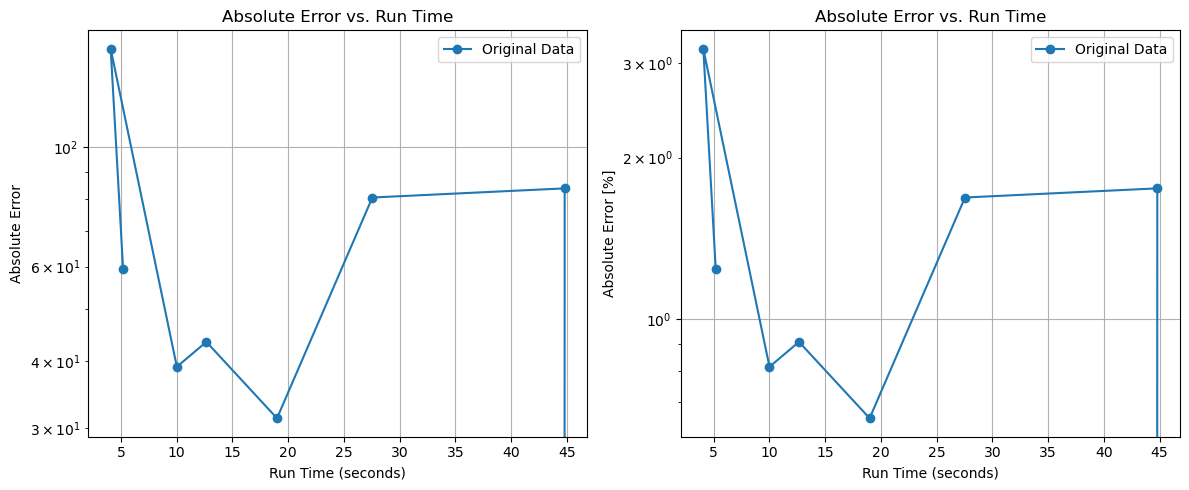

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Data preparation
x_TDR = results_TDR["Run_time"].values.reshape(-1, 1)  # Reshape for sklearn
y_TDR = np.abs(results_TDR["Total Cost Error"])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Subplot 1: Absolute Error vs. Run Time
ax[0].plot(x_TDR, y_TDR, 'o', linestyle = '-',label="Original Data")
ax[0].set_xlabel("Run Time (seconds)")
ax[0].set_ylabel("Absolute Error")
ax[0].set_title("Absolute Error vs. Run Time")
ax[0].set_yscale('log')
ax[0].grid()
ax[0].legend()

ax[1].plot(x_TDR, results_TDR["Total Cost Error [%]"], 'o', linestyle = '-',label="Original Data")
ax[1].set_xlabel("Run Time (seconds)")
ax[1].set_ylabel("Absolute Error [%]")
ax[1].set_title("Absolute Error vs. Run Time")
ax[1].set_yscale('log')
ax[1].grid()
ax[1].legend()

# Adjust layout and display
plt.tight_layout()
plt.show()


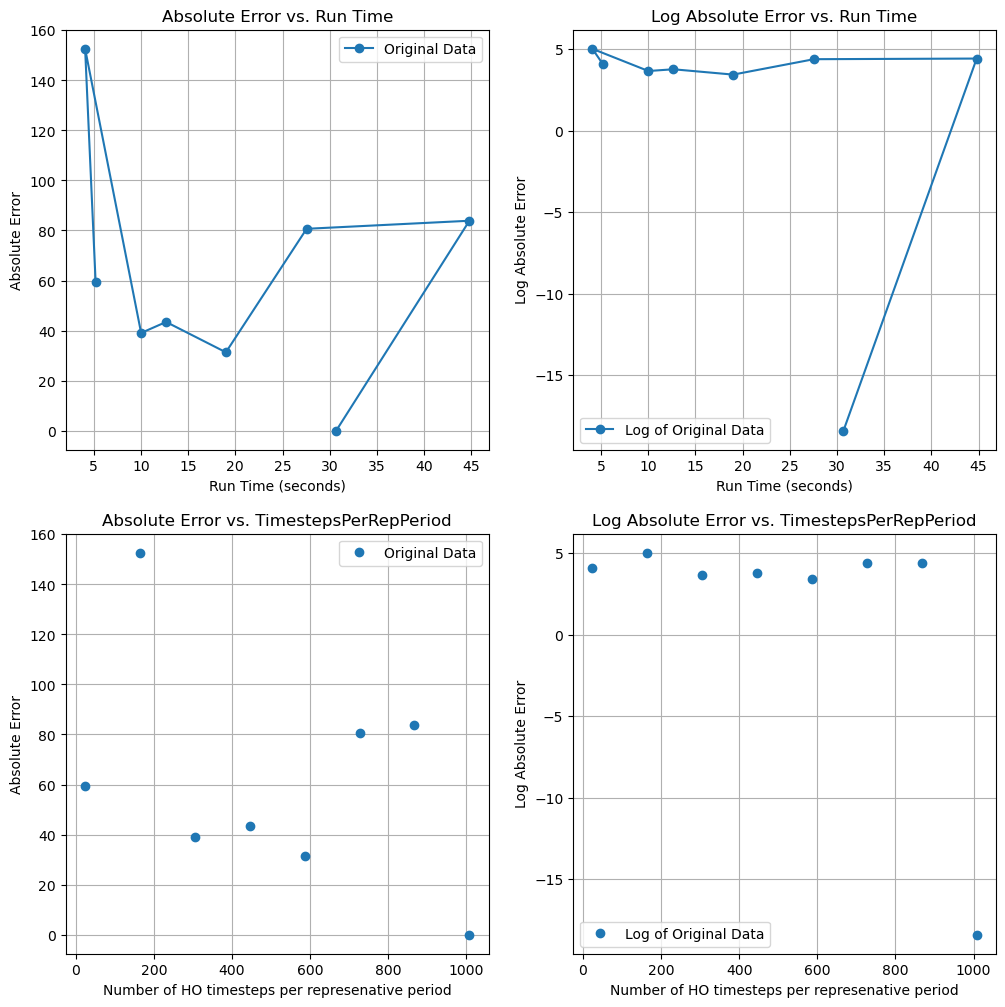

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Data preparation
x_TDR = results_TDR["Run_time"].values.reshape(-1, 1)  # Reshape for sklearn
y_TDR = np.abs(results_TDR["Total Cost Error"])

# # ---- First Graph: Absolute Error vs. Run Time ----
# # Linear Regression
# linear_model_1_TDR = LinearRegression()
# linear_model_1_TDR.fit(x_TDR, y_TDR)
# x_pred_TDR = np.linspace(x_TDR.min(), x_TDR.max(), 500).reshape(-1, 1)  # Smooth x values
# y_linear_pred_1_TDR = linear_model_1_TDR.predict(x_pred_TDR)

# # Polynomial Regression
# degree_1_TDR = 3  # Degree of the polynomial
# poly_1_TDR = PolynomialFeatures(degree_1_TDR)
# x_poly_1_TDR = poly_1_TDR.fit_transform(x_TDR)
# poly_model_1_TDR = LinearRegression()
# poly_model_1_TDR.fit(x_poly_1_TDR, y_TDR)
# x_pred_poly_1_TDR = poly_1_TDR.transform(x_pred_TDR)
# y_poly_pred_1_TDR = poly_model_1_TDR.predict(x_pred_poly_1_TDR)

# # ---- Second Graph: Log of Absolute Error vs. Run Time ----
log_y_TDR = np.log(np.abs(y_TDR) + 1e-8)  # Add small constant to avoid log(0)

# # Linear Regression
# linear_model_2_TDR = LinearRegression()
# linear_model_2_TDR.fit(x_TDR, log_y_TDR)
# y_linear_pred_2_TDR = linear_model_2_TDR.predict(x_pred_TDR)

# # Polynomial Regression
# degree_2_TDR = 3
# poly_2_TDR = PolynomialFeatures(degree_2_TDR)
# x_poly_2_TDR = poly_2_TDR.fit_transform(x_TDR)
# poly_model_2_TDR = LinearRegression()
# poly_model_2_TDR.fit(x_poly_2_TDR, log_y_TDR)
# x_pred_poly_2_TDR = poly_2_TDR.transform(x_pred_TDR)
# y_poly_pred_2_TDR = poly_model_2_TDR.predict(x_pred_poly_2_TDR)

# ---- Plotting ----
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# Subplot 1: Absolute Error vs. Run Time
ax[0, 0].plot(x_TDR, y_TDR, 'o', linestyle = '-',label="Original Data")
ax[0, 0].set_xlabel("Run Time (seconds)")
ax[0, 0].set_ylabel("Absolute Error")
ax[0, 0].set_title("Absolute Error vs. Run Time")
ax[0, 0].grid()
ax[0, 0].legend()

# Subplot 2: Log Absolute Error vs. Run Time
ax[0, 1].plot(x_TDR, log_y_TDR, 'o', linestyle = '-', label="Log of Original Data")
ax[0, 1].set_xlabel("Run Time (seconds)")
ax[0, 1].set_ylabel("Log Absolute Error")
ax[0, 1].set_title("Log Absolute Error vs. Run Time")
ax[0, 1].grid()
ax[0, 1].legend()

# Subplot 3: Absolute Error vs. Epsilon
ax[1, 0].plot(results_TDR["time_rep_period"], y_TDR, 'o', label="Original Data")
ax[1, 0].set_xlabel("Number of HO timesteps per represenative period")
ax[1, 0].set_ylabel("Absolute Error")
ax[1, 0].set_title("Absolute Error vs. TimestepsPerRepPeriod")
ax[1, 0].grid()
ax[1, 0].legend()

# Subplot 4: Log Absolute Error vs. Epsilon
ax[1, 1].plot(results_TDR["time_rep_period"], log_y_TDR, 'o', label="Log of Original Data")
ax[1, 1].set_xlabel("Number of HO timesteps per represenative period")
ax[1, 1].set_ylabel("Log Absolute Error")
ax[1, 1].set_title("Log Absolute Error vs. TimestepsPerRepPeriod")
ax[1, 1].grid()
ax[1, 1].legend()

# # Adjust layout and display
# plt.tight_layout()
# plt.show()
